## E-news Express Project

### Index

- <a href = #link0>Problem Statement</a>
- <a href = #link1>Explore the dataset and extract insights using Exploratory Data Analysis</a>
- <a href = #link2>Do the users spend more time on the new landing page than the old landing page?</a>
- <a href = #link3>Is the conversion rate for the new page greater than the conversion rate for the old page?</a>
- <a href = #link4>Does the converted status depend on the preferred language?</a>
- <a href = #link5>Is the mean time spent on the new page same for the different language users?</a>

### <a name='link0'>**Problem Statement**</a>
#### Background: 
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

#### Objective:
Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

#### Data Dictionary:
1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

### Let us start by importing the required libraries

In [335]:
# Ignore warnings
import warnings as wns
wns.filterwarnings('ignore')

In [336]:
# import the important packages
# library used for data manipulation and analysis
import pandas as pd 
# library used for working with arrays.
import numpy as np 
# library for plots and visualisations
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

# this library contains a large number of probability distributions as well as a growing library of statistical functions.
import scipy.stats as stats 

## <a name='link1'>**1. Explore the dataset and extract insights using Exploratory Data Analysis.**</a>
### Load the input file and understand the structure of the data

In [337]:
# read the data usinf read_csv() method
AB_Test_Data = pd.read_csv("abtest.csv")

# returns the first 5 rows using head() method
AB_Test_Data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:
The AB Test Data DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the preference of each user on page selection based on the landing page served.

In [338]:
# use shape property to print the dimensionality of the DataFrame.
AB_Test_Data.shape

(100, 6)

#### Observations:
The AB Test Data DataFrame has 100 rows and 6 columns. As mentioned in problem description, 50 rows belong to the control group and 50 rows belong to the treatment group.

In [339]:
# use info() method to print a concise summary of the pandas DataFrame
AB_Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
The AB Test Data DataFrame has 6 columns - User ID is integer data type, time spent on page is float data type and the remaining columns (group, landing_page, converted and language_preferred) are objects.

In [340]:
# using the describe() menthod to get the 5 point summary of the numerical columns in the dataframe.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
np.round(AB_Test_Data.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
time_spent_on_the_page,100.0,5.38,2.38,0.19,3.88,5.42,7.02,10.71


#### Observations:
This is the 5 point summary of numerical columns - user_id and time_spent_on_the_page. 
1. Since the User ID is an ID, the mean and standard deviation is not important. 
2. For time_spent_on_the_page, the 5 point summary is critical in understanding the impact of new landing page. The mean time_spent_on_the_page is 5.38 minutes with std deviation of 2.38. The median is 5.42 and the maximum value is 10.71.
The interquantile range (IQR) is (7.02 - 3.88) = 3.14

In [341]:
# using the describe() menthod to get the 5 point summary 
# using 'include' to inculde "object" and "category" columns in the dataframe.
# .T will transponse the table into a readable format with dataframe columns arranged in rows.
AB_Test_Data.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,French,34


#### Observations:
1. For the column 'group', it has two unique values - control and treatment, with a frequency of 50.
2. For the column 'landing_page', it has two unique values - old and new, with a frequency of 50.
3. For the column 'converted', it has two unique values - no and yes. Yes appears more than No.
4. For the column 'language_preferred', it has three unique values - English, French and Spanish.

In [342]:
# using the value_counts() menthod to get the count of each value in a dataframe columns.
AB_Test_Data[['group','landing_page']].value_counts()

group      landing_page
treatment  new             50
control    old             50
dtype: int64

In [343]:
# using the value_counts() menthod to get the count of each value in a dataframe column.
AB_Test_Data['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [344]:
# using the value_counts() menthod to get the count of each value in a dataframe column.
AB_Test_Data['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

## Exploratory Data Analysis (EDA)
### Univariate Analysis

In [345]:
# function to plot a boxplot and a histogram along the same scale.
# These are not mine, I borrowed this from Prof.Abhinanda Sarkar's notebook.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [346]:
# function to create labeled barplots
# These are not mine, I borrowed this from Prof.Abhinanda Sarkar's notebook.
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=60, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

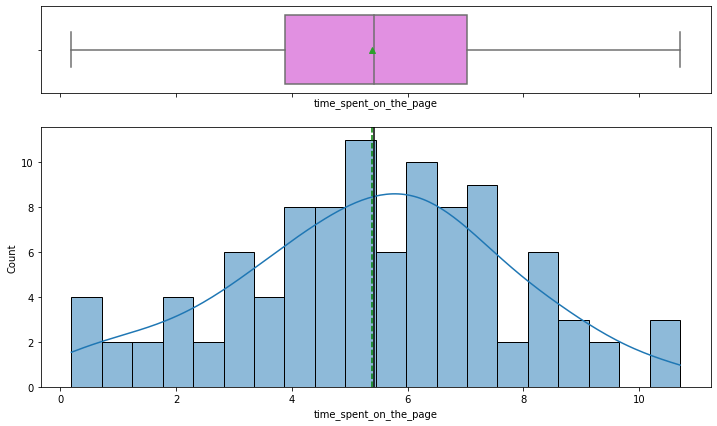

In [347]:
# Display a histogram and boxplot with kde curve for the numeric column 'time_spent_on_the_page'
histogram_boxplot(AB_Test_Data,'time_spent_on_the_page',kde=True,bins=20)

#### Observations:
1. The box plot indciates that there are no data outliers.
2. Since the mean and median are almost equal, The histogram does not have any skewness.
3. About 68% of the values of 'time spend on the page' field ranges from 4 to 7 minutes.

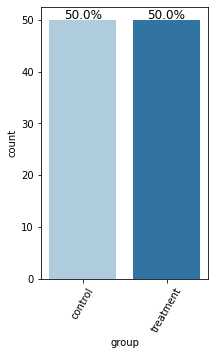

In [348]:
# Display a labeled_barplot for the categorical column 'group'
labeled_barplot(AB_Test_Data,'group',perc=True)

#### Observations:
1. The field group has two unique values - control and treatment.
2. There are 50 observations for both control and treatment groups in this dataset.

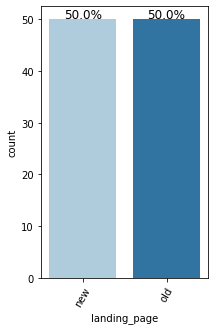

In [349]:
# Display a labeled_barplot for the categorical column 'landing_page'
labeled_barplot(AB_Test_Data,'landing_page',perc=True)

#### Observations:
1. The field landing_page has two unique values - old and new.
2. There are 50 observations for both old and new landing pages in this dataset.

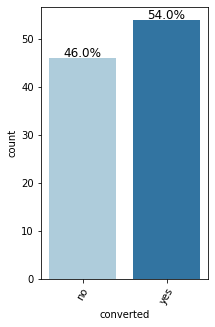

In [350]:
# Display a labeled_barplot for the categorical column 'converted'
labeled_barplot(AB_Test_Data,'converted',perc=True)

#### Observations:
1. The field converted has two unique values - yes and no.
2. There are 54 observations with converted status = 'yes' and 46 observations with converted status = 'no'

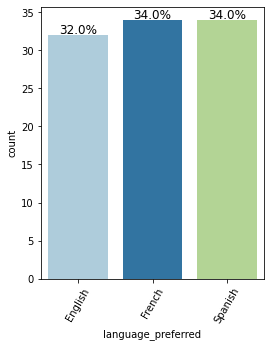

In [351]:
# Display a labeled_barplot for the categorical column 'language_preferred'
labeled_barplot(AB_Test_Data,'language_preferred',perc=True)

#### Observations:
1. The field language_preferred has three unique values - French, Spanish and English.
2. There are 34 observations each for preferred langauge French and Spanish.
2. There are 32 observations each for preferred langauge English.

### Bivariate and Multivariate Analysis

#### Starting with pairplot and heat map of numerical fields

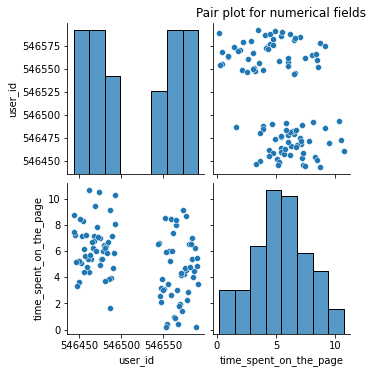

In [352]:
# Display a pair plot to find the relationship between numerical fields.
sns.pairplot(AB_Test_Data)

# Set the title for the plot
plt.title('Pair plot for numerical fields')
plt.show()

#### Observations
A set of users have spend more time on the landing page than the other set. Other than that there seems to be no correlation between the user id and time spent on page field in this dataset.

In [353]:
# Print the correlation between numerical columns.
AB_Test_Data.corr().round(2)

,user_id,time_spent_on_the_page
user_id,1.00,-0.37
time_spent_on_the_page,-0.37,1.00


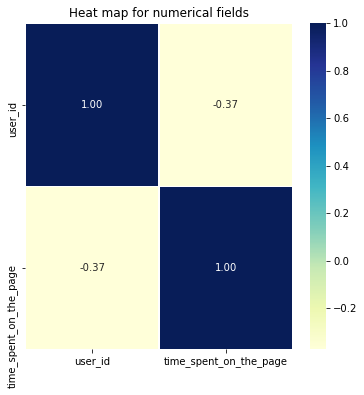

In [354]:
# Set the figure size and title for the plot
plt.figure(figsize=(6,6))
plt.title('Heat map for numerical fields')

# Display a heat map to find the relationship between numerical fields.
sns.heatmap(AB_Test_Data.corr(),annot=True,linewidths=0.2,fmt=".2f",cmap="YlGnBu")
plt.show()

#### Observations
1. The heatmap observations are not different from pairplot.
2. A set of users have spend more time on the landing page than the other set. Other than that there seems to be no correlation between the user id and time spent on page field in this dataset.

#### This is attempt to find correlation. Let's replace the categorical field values with numerical values and then redo the pairplot and heat map.
1. Replacing the value of group field - 'control' with 'zero' and 'treatment' with 'one'.
2. Replacing the value of landing_page field - 'old' with 'zero' and 'new' with 'one'.
3. Replacing the value of converted field - 'no' with 'zero' and 'yes' with 'one'.
4. Replacing the value of language_preferred field - 'English' with 'zero', 'Spanish' with 'one' and 'French' with 'two'.

In [355]:
# Get a copy of the original dataset using .copy() command.
AB_Test_Data_Corr = AB_Test_Data.copy()

# Replacing the value of group field - 'control' with 'zero' and 'treatment' with 'one'.
# Replacing the value of landing_page field - 'old' with 'zero' and 'new' with 'one'.
# Replacing the value of converted field - 'no' with 'zero' and 'yes' with 'one'.
# Replacing the value of language_preferred field - 'English' with 'zero', 'Spanish' with 'one' and 'French' with 'two'.
AB_Test_Data_Corr.replace({'group':'control', 'landing_page':'old', 'converted':'no', 'language_preferred':'English'}, 0, inplace=True)
AB_Test_Data_Corr.replace({'group':'treatment', 'landing_page':'new', 'converted':'yes', 'language_preferred':'Spanish'}, 1, inplace=True)
AB_Test_Data_Corr.replace({'language_preferred':'French'}, 2, inplace=True)

# returns the first 5 rows using head() method
AB_Test_Data_Corr.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,0,0,3.48,0,1
1,546468,1,1,7.13,1,0
2,546462,1,1,4.40,0,1
3,546567,0,0,3.02,0,2
4,546459,1,1,4.75,1,1


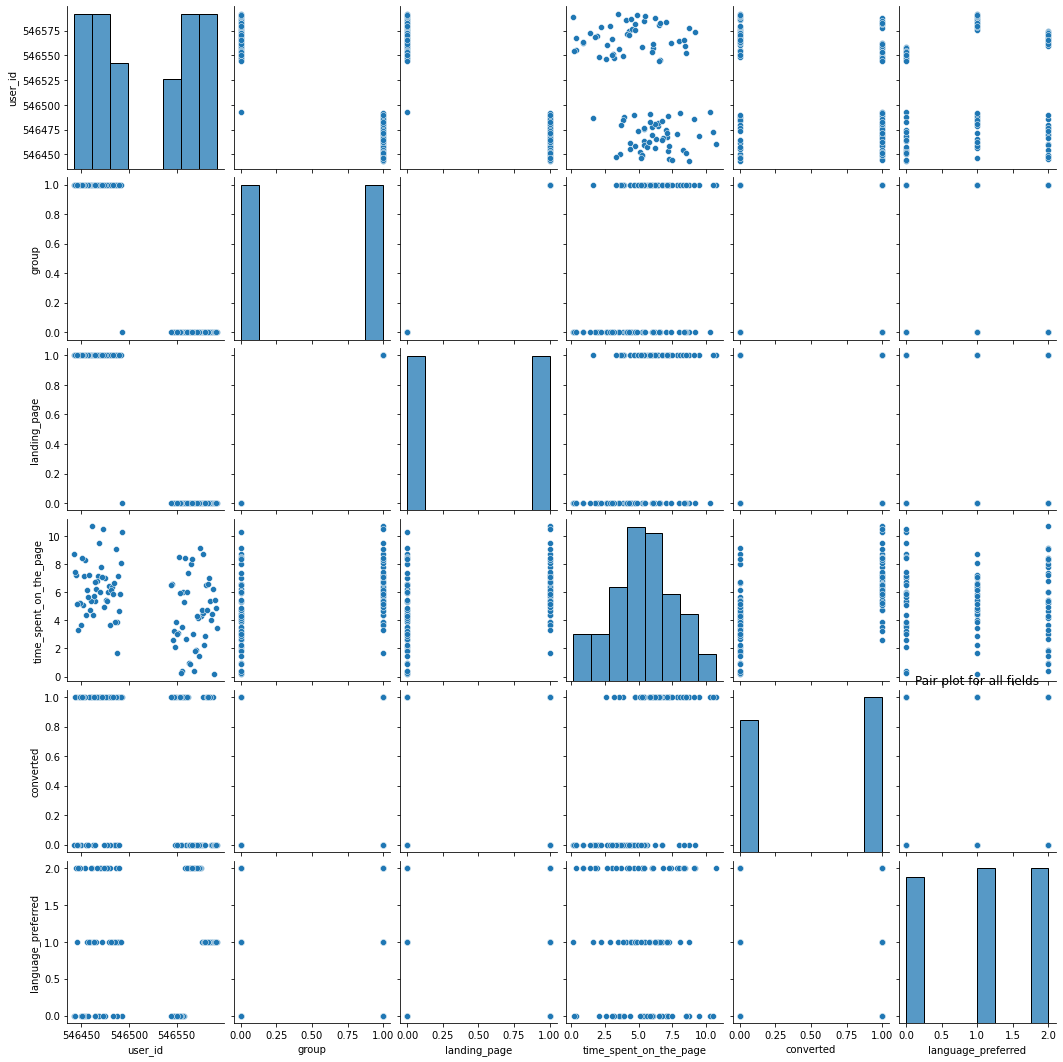

In [356]:
# Display a pair plot to find the relationship between numerical fields.
sns.pairplot(AB_Test_Data_Corr)

# Set the title for the plot
plt.title('Pair plot for all fields')
plt.show()

Let's look at the heatmap before writing the observations.

In [357]:
# Print the correlation between numerical columns.
AB_Test_Data_Corr.corr().round(2)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
user_id,1.00,-0.95,-0.95,-0.37,-0.28,0.09
group,-0.95,1.00,1.00,0.36,0.24,-0.00
landing_page,-0.95,1.00,1.00,0.36,0.24,-0.00
time_spent_on_the_page,-0.37,0.36,0.36,1.00,0.57,-0.05
converted,-0.28,0.24,0.24,0.57,1.00,-0.17
language_preferred,0.09,-0.00,-0.00,-0.05,-0.17,1.00


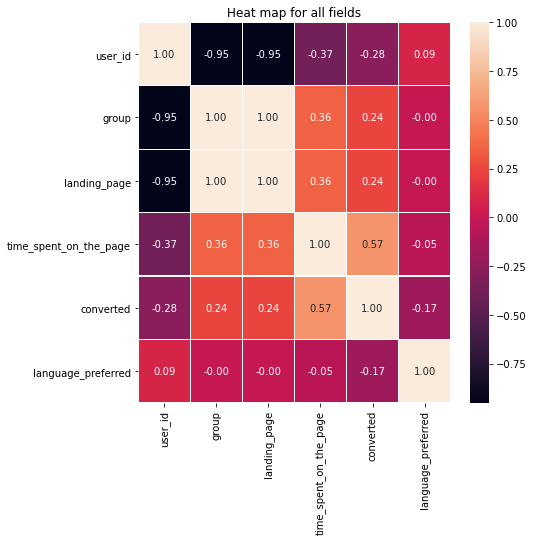

In [358]:
# Set the figure size and title for the plot
plt.figure(figsize=(7,7))
plt.title('Heat map for all fields')

# Display a heat map to find the relationship between numerical fields.
sns.heatmap(AB_Test_Data_Corr.corr(),annot=True,linewidths=0.2,fmt=".2f")
plt.show()

1. There is a one-to-one correlation between group and landing page. This is not significant as all the users in control group gets old landing page and all users in treatment group gets new landing page.
2. This is good correlation (0.57) between time spent on page and converted to subscriber. So we can say that more the time spent on the page, there is a better chance to become a subscriber.
3. This is good correlation (0.36) between time spent on page and landing page (and group). So depending on landing page (old or new), there is an increase in time spent on page.
4. It appears like the language is not a major factor for users to be conveted to subscriber.

No of Users
language_preferred landing_page converted             
English            old          no                   5
                                yes                 11
                   new          no                   6
                                yes                 10
French             old          no                  14
                                yes                  3
                   new          no                   5
                                yes                 12
Spanish            old          no                  10
                                yes                  7
                   new          no                   6
                                yes                 11

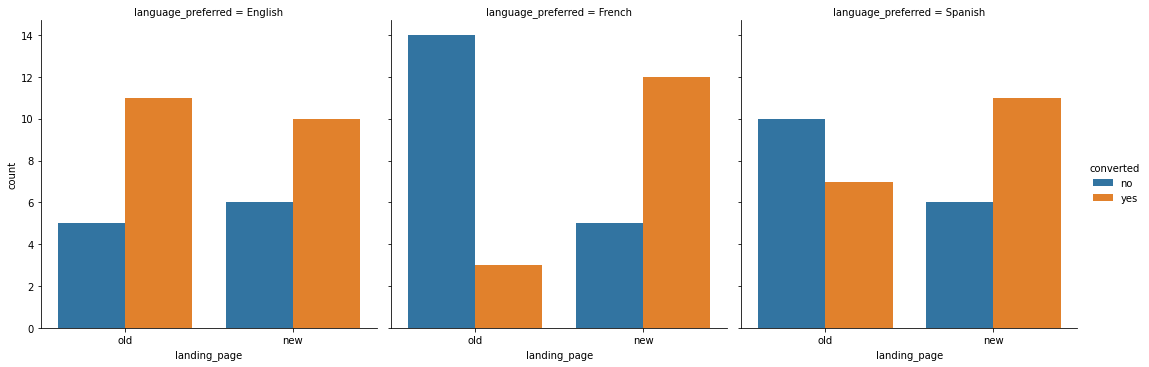

In [359]:
AB_Test_Data_Grouped = AB_Test_Data[['user_id']].groupby(by=[AB_Test_Data['language_preferred'],AB_Test_Data['landing_page'],AB_Test_Data['converted']]).count()
AB_Test_Data_Grouped.rename(columns={'user_id':'No of Users'},inplace=True)
display(AB_Test_Data_Grouped.sort_values(by=['language_preferred','landing_page','converted'],ascending = (True, False, True)))

sns.catplot(x="landing_page",
            hue="converted",
            col="language_preferred",
            data=AB_Test_Data,
            kind="count", # No y value for count
            legend=True,
            col_order= AB_Test_Data['language_preferred'].sort_values().unique()
           ) 
plt.show()  # show the plot

#### Bivariate analysis

In [1]:
# Set the figure size and title for the plot
plt.figure(figsize=(8,5))
plt.title('Bivariate analysis of the fields using Strip plot - landing page and time spent on the page')

# Strip plot for analyzing the fields - landing page and time spent on the page
sns.stripplot(x=AB_Test_Data["landing_page"],y=AB_Test_Data["time_spent_on_the_page"],jitter=True)
plt.show()

NameError: name 'plt' is not defined

#### Observations
1. It is evident that the users spent more time on the new landing page.
2. The users landed on the old page tend to spent a time from less than a minute to more than 10 minutes.
3. The users landed on the new page have consistently spent more than 3.5 minutes.

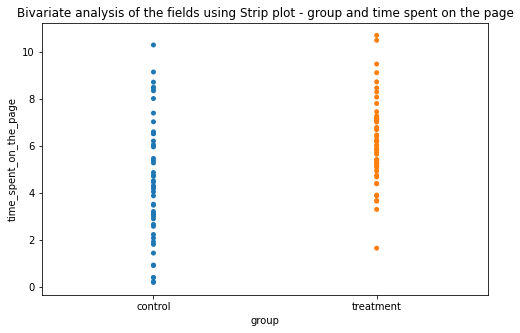

In [361]:
# Set the figure size and title for the plot
plt.figure(figsize=(8,5))
plt.title('Bivariate analysis of the fields using Strip plot - group and time spent on the page')

# Strip plot for analyzing the fields - group and time spent on the page
sns.stripplot(x=AB_Test_Data["group"],y=AB_Test_Data["time_spent_on_the_page"],jitter=False)
plt.show()

#### Observations
1. We are expected to get the same pattern as landing page as landing page and group have one-to-one correlation.
2. The users in control group tend to spent a time from less than a minute to more than 10 minutes.
3. The users in treatment to group have consistently spent more than 3.5 minutes.

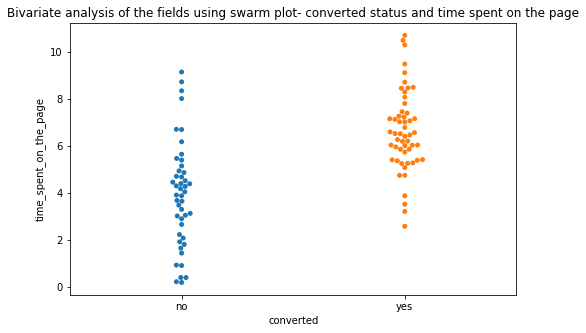

In [362]:
# Set the figure size and title for the plot
plt.figure(figsize=(8,5))
plt.title('Bivariate analysis of the fields using swarm plot- converted status and time spent on the page')

# Swarm plot for analying the fields - converted status and time spent on the page
sns.swarmplot(x=AB_Test_Data["converted"],y=AB_Test_Data["time_spent_on_the_page"])
plt.show()

#### Observations
1. The more the time spent on the page, there is a greater chance to getting converted to a subscriber.
2. The users who did not get converted to subscriber have less mean time spent on the page.

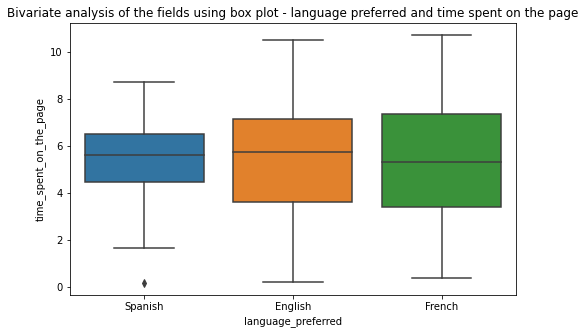

In [363]:
# Set the figure size and title for the plot
plt.figure(figsize=(8,5))
plt.title('Bivariate analysis of the fields using box plot - language preferred and time spent on the page')

# Box plot for analysing the fields - language preferred and time spent on the page
sns.boxplot(x=AB_Test_Data["language_preferred"],y=AB_Test_Data["time_spent_on_the_page"])
plt.show()

#### Observations
1. The mean time spent on the page is almost same for all three languages - Spanish, English and French.
2. The Interquantile range (IQR) for Spanish is lower compared to others, meaning the values for Spanish is in a closer range. Note that Spanish has an oulier value.
2. The Interquantile range (IQR) for English and French is higher than Spanish.

#### Multivariate analysis

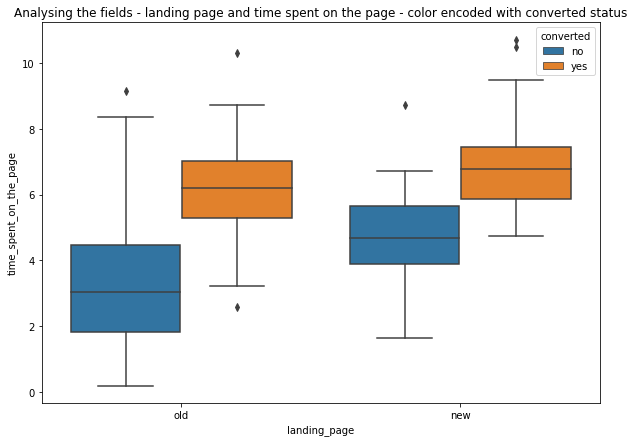

In [364]:
# Set the figure size and title for the plot
plt.figure(figsize=(10,7))
plt.title('Analysing the fields - landing page and time spent on the page - color encoded with converted status')

# Box plot - landing page and time spent on the page with converted column used for colour encoding
sns.boxplot(x='landing_page',y='time_spent_on_the_page',data=AB_Test_Data,hue='converted')
plt.show()

#### Observations
1. Regardless of the type of landing page, that more the time spent on the page, there is a better chance to become a subscriber.
2. The mean time spend on new landing page is higher than the old landing page.

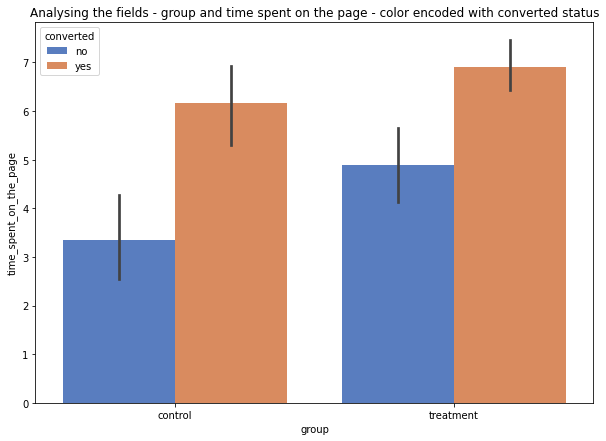

In [365]:
# Set the figure size and title for the plot
plt.figure(figsize=(10,7))
plt.title('Analysing the fields - group and time spent on the page - color encoded with converted status')

# Show the barplot with a legend - group and time spent on the page 
sns.barplot(x="group",y="time_spent_on_the_page",data=AB_Test_Data,palette="muted",hue='converted')
plt.show()

#### Observations
1. Regardless of the type of group, that more the time spent on the page, there is a better chance to become a subscriber.
2. The mean time spend on treatment group's landing page is higher than the control group's landing page.

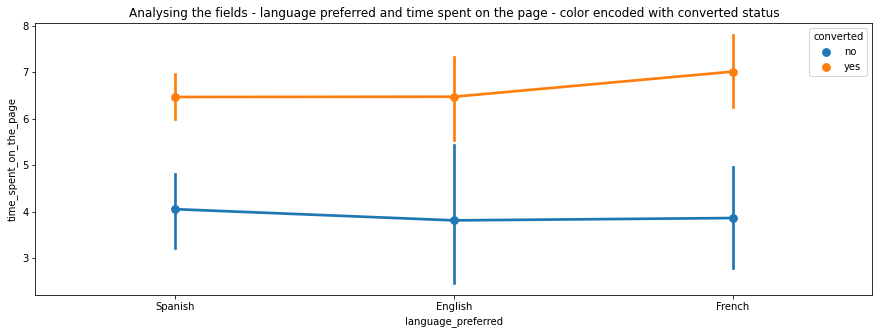

In [366]:
# Set the figure size and title for the plot
plt.figure(figsize=(15,5))
plt.title('Analysing the fields - language preferred and time spent on the page - color encoded with converted status')

# Show the pointplot with a legend - language preferred and time spent on the page 
sns.pointplot(x="language_preferred", y="time_spent_on_the_page", hue = 'converted',  data=AB_Test_Data)
plt.show()

#### Observations
1. Again, no surprises here. Regardless of the language, the users who spent more time on a page has a better chance to becoming a subscriber. 
2. The French language users who coverted to subscribers have a higher mean time spent on the page. Looks like they liked the feartures of the new page more than other language customers. 

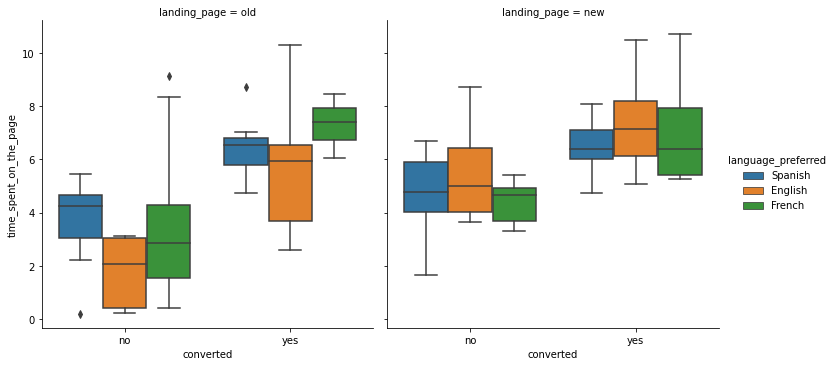

In [367]:
# Show the Categorical Box plot with a legend - converted, landing page, language preferred and time spent on the page 
sns.catplot(x="converted",
            y="time_spent_on_the_page",
            hue="language_preferred",
            col="landing_page",
            data=AB_Test_Data,
            kind="box"
           )
plt.show()

#### Observations
1. For the old landing page, the time spent on page for converted users is very high for users who did not convert. This is true for all laguages. 
2. For the new landing page, the time spent on page for converted users is marginally high for users who did not convert. This is true for all laguages. 
3. This proves that the new page is doing a better job compared to the old landing page across languages.

No of Users
language_preferred landing_page converted             
English            old          no                   5
                                yes                 11
                   new          no                   6
                                yes                 10
French             old          no                  14
                                yes                  3
                   new          no                   5
                                yes                 12
Spanish            old          no                  10
                                yes                  7
                   new          no                   6
                                yes                 11

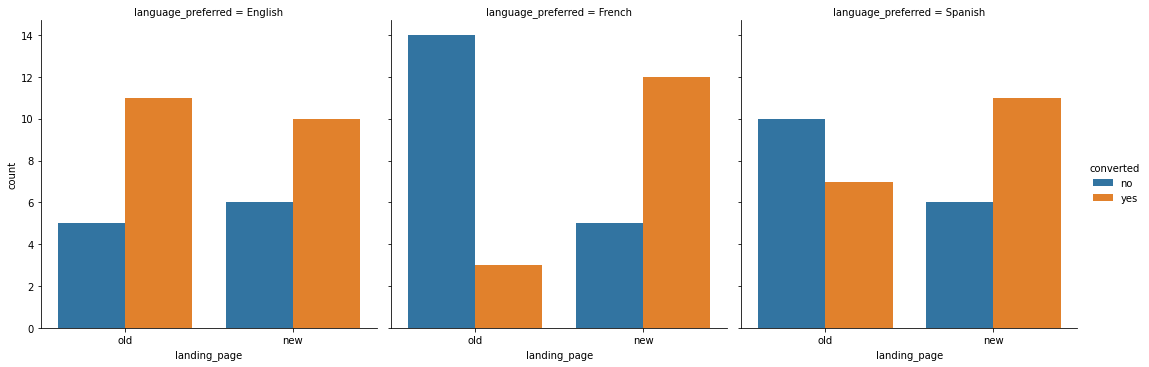

In [368]:
# Lets look at the count of users.

# Get the count of users grouped by language, landing page and convered status
AB_Test_Data_Grouped = AB_Test_Data[['user_id']].groupby(by=[AB_Test_Data['language_preferred'],AB_Test_Data['landing_page'],AB_Test_Data['converted']]).count()
# Rename the column to No of Users.
AB_Test_Data_Grouped.rename(columns={'user_id':'No of Users'},inplace=True)
# Display the dataframe sorted by language, landing page and convered status
display(AB_Test_Data_Grouped.sort_values(by=['language_preferred','landing_page','converted'],ascending = (True, False, True)))


# Show the Categorical Count plot with a legend - converted, landing page, language preferred and number of users. 
sns.catplot(x="landing_page",
            hue="converted",
            col="language_preferred",
            data=AB_Test_Data,
            kind="count",
            legend=True,
            col_order= AB_Test_Data['language_preferred'].sort_values().unique()
           ) 
plt.show()  # show the plot

#### Observations
1. For English, there is a good chance to converting to subscriber regardless of the landing page.
    - Out of the 16 users landed in old page, 11 of them convered to subscribers.
    - Out of the 16 users landed in new page, only 10 of them convered to subscribers.
2. For French, there is a good chance to converting to subscriber if the user lands in new landing page.
    - Out of the 17 users landed in old page, only 3 of them convered to subscribers.
    - Out of the 17 users landed in new page, 12 of them convered to subscribers.
3. For Spanish, there is a good chance to converting to subscriber if the user lands in new landing page.
    - Out of the 17 users landed in old page, only 7 of them convered to subscribers.
    - Out of the 17 users landed in new page, 11 of them convered to subscribers.

### Insights
1. Overall, the new landing page design is promising. The users landed on the new page has a great chance of becoming a subscriber. The E-News Express Design team should focus to making the page more user friendly.
2. The time spent on the page is a major factor for becoming a subscriber. This trend can be seen on old landing page as well. The E-News Express Design team should add more features in the page, so that the user spends more time on it an eventually becomes a subscriber.
3. The preferred langauage does not seem to have a big impact when it comes to user subscription. For English, one can say that the almost 65% of users have subscribed regardless of the landing page. But on a deeper analysis, we can infer that these converted users spend an average of 5 minutes in the landing page and that could be a reason for the subscription.
4. It is impossible to ignore that the French language users who coverted to subscribers spent higher than average time on the landing page. Looks like they liked the feartures of the new page more than other language customers. This implies the importance of designing pages taking into account the nature of the target population rather than a one-size-fits-all approach.
5. E-News Express Design team should continue to improve the design landing pages and continue testing with an expanded user group to yield better results.
6. E-News Express should consider better marketing approaches to promote user subscription. Offering discounts and shopping coupons will encourage users to subscribe for E-News Express.
7. E-News Express should consider expanding the existing market and provide more language options. This could lead to more user subscription.


## <a name='link2'>**2. Do the users spend more time on the new landing page than the old landing page?**</a>

### Writing the null and alternate hypotheses

Let $\mu_o, \mu_n$ be the mean time spend on old landing page and new landing page respectively.

We will test the null hypothesis

>$H_0:\mu_o=\mu_n$

against the alternate hypothesis

>$H_a:\mu_o<\mu_n$

In [369]:
# Split the dataset for new and old landing pages.
Time_Spent_On_Old_Page = AB_Test_Data[AB_Test_Data['landing_page']=='old']['time_spent_on_the_page']
Time_Spent_On_New_Page = AB_Test_Data[AB_Test_Data['landing_page']=='new']['time_spent_on_the_page']

# find the sample means and sample standard deviations for the two samples
print('The mean time spent on Old Page is', np.round(Time_Spent_On_Old_Page.mean(),2))
print('The mean time spent on New Page is', np.round(Time_Spent_On_New_Page.mean(),2))
print('The standard deviation of time spent on Old Page is', np.round(Time_Spent_On_Old_Page.std(),2))
print('The standard deviation of time spent on New Page is', np.round(Time_Spent_On_New_Page.std(),2))

The mean time spent on Old Page is 4.53
The mean time spent on New Page is 6.22
The standard deviation of time spent on Old Page is 2.58
The standard deviation of time spent on New Page is 1.82


### Testing whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different type of landing pages, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Lets find the p-value using the two sample T-test for this problem.

In [370]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value and test_stat
test_stat, p_value = ttest_ind(Time_Spent_On_Old_Page, Time_Spent_On_New_Page, equal_var = False)#, alternative = 'less')
print('The test_stat is ' + str(test_stat))
print('The p-value is ' + str(p_value))

The test_stat is -3.7867702694199856
The p-value is 0.0002784762450333098


### Insight
As the p-value(~0.002) is much less than the level of significance, we can reject the null hypothesis. Hence, we have significant evidence to conclude that the users spend more time on the new landing page than the old landing page at 0.05 significance level.

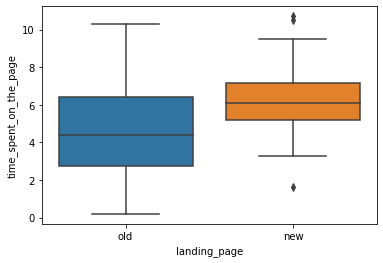

In [371]:
# Box plot for analysing landing page and time spent on the page
sns.boxplot(x=AB_Test_Data["landing_page"],y=AB_Test_Data["time_spent_on_the_page"])
plt.show()

#### Observations
It appears like the box plot supports the conclusion that the users spend more time on the new landing page than the old landing page.

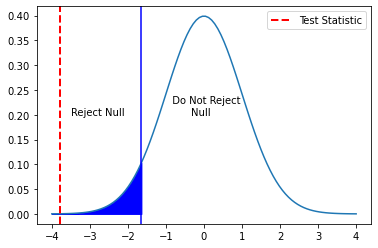

In [372]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(0.05)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'b') # draw a vertical red line through the mentioned point
plt.axvline(x = test_stat, c = 'r',linestyle="dashed", linewidth=2, label="Test Statistic") # draw a vertical red line for test statistic
x1 = np.linspace(-4, critical_val, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='b') # fill the area under the curve before the critical value with red color
plt.annotate('Reject Null', (-3.5, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.legend()
plt.show() # display the plot

#### Observations
We have proved the hypothesis using p-value in an earlier step. This is only a visual to demonstrate the rejection region and where the test statistic lies on it.

## <a name='link3'>**3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**</a>

In [373]:
# Find the proportion of conversions for each landing pages.

# Group the data to get the count of users at landing_page and converted status level
AB_Test_Data_Conversions = AB_Test_Data[['user_id']].groupby(by=[AB_Test_Data['landing_page'],AB_Test_Data['converted']]).count()
# Rename the column user_id to No of users.
AB_Test_Data_Conversions.rename(columns={'user_id':'No of Users'},inplace=True)
# Display the Grouped dataframe
AB_Test_Data_Conversions.reset_index()

,landing_page,converted,No of Users
0,new,no,17
1,new,yes,33
2,old,no,29
3,old,yes,21


### Writing the null and alternative hypothesis
Let $p_o,p_n$ be the proportions of users converted to subscribers in old and new landing pages respectively.

We will test the null hypothesis

>$H_0:p_o =p_n$

against the alternate hypothesis

>$H_a:p_o < p_n$

### We can find the p-value using Two Proportion Z-test

### Testing whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted to a subscriber or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

>$n_op_o = 50\cdot \frac{21}{50} =21 \geq 10\\
n_o(1-p_o) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
n_np_n = 50\cdot \frac{33}{50} =33 \geq 10\\
n_n(1-p_n) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $

In [374]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value and test_stat
test_stat, p_value = proportions_ztest(defect_count, nobs)
print('The test_stat is ' + str(test_stat))
print('The p-value is ' + str(p_value))

The test_stat is -2.4077170617153842
The p-value is 0.016052616408112556


### Insight
As the p-value(~0.016) is much less than the level of significance, we can reject the null hypothesis. Hence, we have significant evidence to conclude that the proportion of users who visit the landing page and get converted for the new page greater than the conversion rate for the old page at 0.05 significance level.

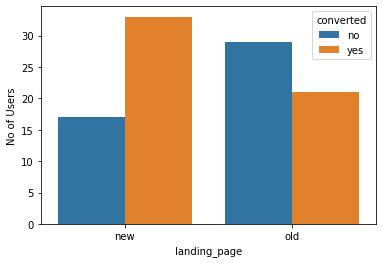

In [375]:
# Bar plot - landing page and number of users with converted column used for colour encoding
sns.barplot(x='landing_page',y='No of Users',data=AB_Test_Data_Conversions.reset_index(),hue='converted')
plt.show()

#### Observations
It appears like the bar plot supports the conclusion that the proportion of users who visit the landing page and get converted for the new page greater than the conversion rate for the old page.

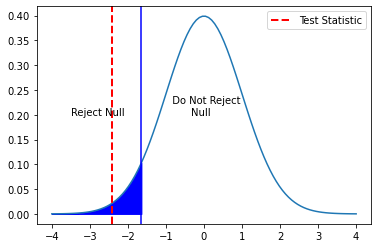

In [376]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(0.05)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'b') # draw a vertical red line through the mentioned point
plt.axvline(x = test_stat, c = 'r',linestyle="dashed", linewidth=2, label="Test Statistic") # draw a vertical red line for test statistic
x1 = np.linspace(-4, critical_val, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='b') # fill the area under the curve before the critical value with red color
plt.annotate('Reject Null', (-3.5, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.legend()
plt.show() # display the plot

#### Observations
We have proved the hypothesis using p-value in an earlier step. This is only a visual to demonstrate the rejection region and where the test statistic lies on it.

## <a name='link4'>**4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]**</a>

In [377]:
# Creating a contingency table using crosstab function.
AB_Test_Data_Contingency = pd.crosstab(AB_Test_Data['language_preferred'],AB_Test_Data['converted']).reset_index()
AB_Test_Data_Contingency

converted,language_preferred,no,yes
0,English,11,21
1,French,19,15
2,Spanish,16,18


### Writing the null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ Language preference is independent of converted status.

against the alternate hypothesis

>$H_a:$ Language preference depends on converted status.

### We can find the p-value using the Chi-Square Test for Independence

### Testing whether the assumptions for Chi-Square Test for Independence are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


In [378]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(AB_Test_Data_Contingency.drop('language_preferred',axis=1))
print('The chi is', chi)
print('The p-value is', p_value)

The chi is 3.0930306905370832
The p-value is 0.2129888748754345


### Insight
As the p-value(~0.212) is much greater than the level of significance (0.05), we failed to reject the null hypothesis. Hence, we have significant evidence to conclude that the language preference is independent of converted status at 0.05 significance level.

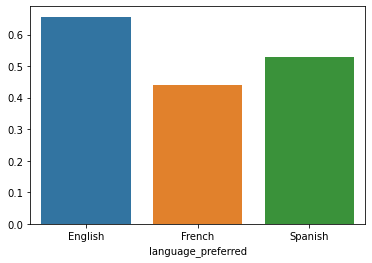

In [379]:
# Bar plot - language_preferred and conversion rate
sns.barplot(x=AB_Test_Data_Contingency['language_preferred'],y=AB_Test_Data_Contingency['yes']/(AB_Test_Data_Contingency['yes']+AB_Test_Data_Contingency['no']),data=AB_Test_Data_Contingency)
plt.show()

#### Observations
It appears like the bar plot supports the conclusion that the language preference is independent of converted status.

## <a name='link5'>**5. Is the mean time spent on the new page same for the different language users?**</a>

In [380]:
# Filter the rows where the landing page is "new"
AB_Test_Data_New_Landing_Page = AB_Test_Data[AB_Test_Data['landing_page']=='new']

# Display the first five rows of the dataset
AB_Test_Data_New_Landing_Page.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


### Here, time_spent_on_the_page is the response and language_preferred is the factor.

In [381]:
# get the levels of factor language_preferred
AB_Test_Data_New_Landing_Page['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

### Let's write the null and alternative hypothesis

Let $\mu_f, \mu_s, \mu_e$ be the means of time spent on new landing page for fuel type French, Spanish and English respectively.

We will test the null hypothesis

>$H_0: \mu_f = \mu_s = \mu_e$ The mean time spent on new landing page for fuel type French, Spanish and English is equal

against the alternative hypothesis

>$H_a: $ At least one of the mean time spent on new landing page is different from the rest.


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


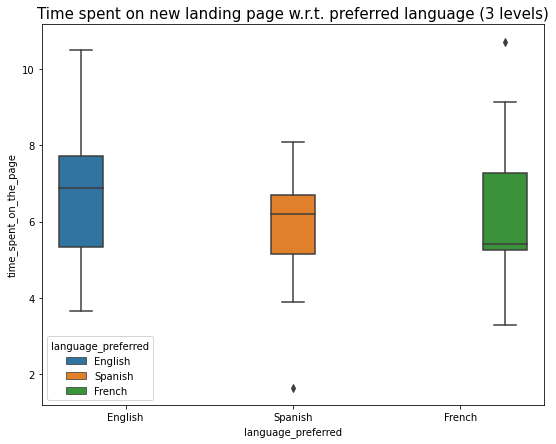

In [382]:
# mean of time spent on new landing page at different levels of the language_preferred factor
print(AB_Test_Data_New_Landing_Page.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (9,7))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = AB_Test_Data_New_Landing_Page, hue = 'language_preferred')
a.set_title("Time spent on new landing page w.r.t. preferred language (3 levels)", fontsize=15)
plt.show()

For using One-way ANOVA Test, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on new landing page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on new landing page does not follow a normal distribution

In [383]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(AB_Test_Data_New_Landing_Page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value (~0.804) of the test is greater than 0.05, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [384]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( AB_Test_Data_New_Landing_Page['time_spent_on_the_page'][AB_Test_Data_New_Landing_Page['language_preferred']=="English"], 
                                   AB_Test_Data_New_Landing_Page['time_spent_on_the_page'][AB_Test_Data_New_Landing_Page['language_preferred']=="Spanish"], 
                                   AB_Test_Data_New_Landing_Page['time_spent_on_the_page'][AB_Test_Data_New_Landing_Page['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value (~0.467) is greater than 0.05, we fail to reject the null hypothesis of homogeneity of variances.

### Testing whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Finding the p-value using One-way ANOVA Test

In [385]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(AB_Test_Data_New_Landing_Page.loc[AB_Test_Data_New_Landing_Page['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              AB_Test_Data_New_Landing_Page.loc[AB_Test_Data_New_Landing_Page['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              AB_Test_Data_New_Landing_Page.loc[AB_Test_Data_New_Landing_Page['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The test_stat is ' + str(test_stat))
print('The p-value is ' + str(p_value))

The test_stat is 0.854399277000682
The p-value is 0.43204138694325955


### Insight
As the p-value (~0.432) is much greater than the significance level, we failed to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that the mean time spent on the new page is same for the different language users at 5% significance level.

If we want to drill down further and verify the above conclusion, Multiple comparison tests can be used to see the differences between all pairs of means.

### Multiple Comparison test (Tukey HSD)

In order to identify for which fuel type mean carbon emission is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_f=𝜇_s \text{ and } 𝜇_s=𝜇_e \text{ and } 𝜇_f=𝜇_e$

against the alternative hypothesis

 > $𝐻_a: 𝜇_f\neq𝜇_s \text{ or } 𝜇_s\neq𝜇_e \text{ or } 𝜇_f\neq𝜇_e$

In [386]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = AB_Test_Data_New_Landing_Page['time_spent_on_the_page'], groups = AB_Test_Data_New_Landing_Page['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


### Insight

As the p-values (p-adj column) for comparing the mean time spent on the new page for the pair English-French, English-Spanish and French-Spanish is greater than the significance level, the null hypothesis of equality of all population means cannot be rejected.

Thus, we can say that the mean time spent on the new page for English-French, English-Spanish and French-Spanish is similar.

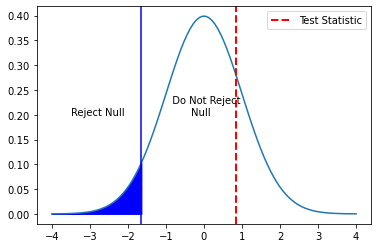

In [387]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(0.05)

# plot the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'b') # draw a vertical red line through the mentioned point
plt.axvline(x = test_stat, c = 'r',linestyle="dashed", linewidth=2, label="Test Statistic") # draw a vertical red line for test statistic
x1 = np.linspace(-4, critical_val, 50) # create an array of 50 numbers starting from -4 and ending at the critical value
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='b') # fill the area under the curve before the critical value with red color
plt.annotate('Reject Null', (-3.5, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.legend()
plt.show() # display the plot

#### Observations
We have proved the hypothesis using p-value in an earlier step. This is only a visual to demonstrate the rejection region and how the test statistic lies outside the rejection region.